<a href="https://colab.research.google.com/github/sautrikc/Seasons-of-Code/blob/main/Week_1_3_Checkpoint_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Week 1

### What is Time Series and its forecasting?

A Time Series is an ordered series of events. Time series forecasting involves identifying patterns in historical time series data and using it to predict the future whereas time series analysis deals with finding out the answer to the questions -  what happens and why does it happen?

A typical time series can be broken down into the following three components:


1.   **Trend:** It signifies the change in the time series over a long period of time. For example, if the mean of the time series is increasing over a long period of time, then we can say that there is an increasing trend.
2.   **Seasonality**: These are wave like changes over a short period of time. These cyclic changes occur after fixed time intervals.
3. **Cycles**: These are cyclic changes occuring over a long period of time without a fixed periodicity. For example, business cycles show patterns of growth, recession and recovery. But they don't have a fixed interval of time between successive cycles.
4. **Irregularities**: This is the random component in the data, occuring because of unexpected events or some noise.



### Cross sectional, pooled and panel data

**Cross-sectional data** is the polar opposite of time series data, as it involves gathering and arranging multiple types of data at a single point in time. Because cross-sectional data does not rely on natural observation ordering, it can be entered in any order.

**Pooled and panel data** combines the two - cross sectional and time series data. The only difference is that panel data consists of multi-dimensional units taking data for the same samples at different points of time whereas pooled data collects data from random group of samples at different points in time.

### Taxonomy of time series data



*   **Inputs and Outputs**: Inputs consist of the historical information provied in the model whereas outputs is the predicted value for a future time step.
*   **Endogenous and exogenous**: If the input data consists of variables which are dependent on one another (dependent of t-1, t-2... ), then it is defined as endogenous data. In the case of exogenous data, input variables are not dependent on one another. Time series forecasting problems typically have endogenous data.


*   **Structured and unstructed data**: If there are systemic time dependent patterns in the time series (trend, seasonality) then it is called as structured data, and unstructed if otherwise.
*   Univariate and Multivariate: If one variable is measured over time, then it is called as univariate data and if multiple variables are measured then it is called multivariate data.


*   **Single step and Multi step**: Single step forecasting involves prediction of one future time step whereas, multistep forecasting involves forecasting over multiple future time steps.
*   **Static and Dynamic**: In static models, the model is not updated with newly available data to make future predictions whereas in dynamic models, the input is constantly updated with newly available data.


*   **Contiguous and Discontiguous**: If the input data is collected after fixed intervals of time (hourly, daily etc.), then it is called contiguous data and called discontiguous if the time intervals are non-uniform. This may have occured becasue of missing or corrupt values.








## Week 2

### Classical Time Series Analysis techniques

In the following sections, the time series data for minimum temperatures has been analysed using different classical time series analysis techniques.

In [ ]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np

In [ ]:
df = pd.read_csv('daily-min-temperatures.csv')

In [ ]:
df.head(5)

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [ ]:
df.info() #Checking if data contains missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


The data does not contain missing values.

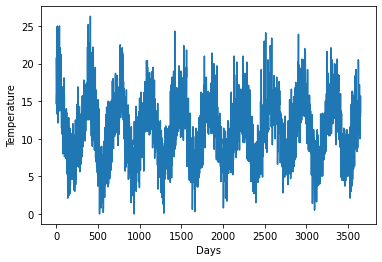

In [ ]:
#Plotting the data
ax = plt.plot(df['Temp'])
plt.xlabel('Days')
plt.ylabel('Temperature')
plt.show()

In [ ]:
pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 1. Autoregressive model

It models the next step in the sequence as a linear function of the observations at prior time steps.

In [ ]:
#
# Load AutoReg class from statsmodels.tsa.ar_model module
#
from statsmodels.tsa.ar_model import AutoReg
# Check for stationarity of the time-series data
# We will look for p-value. In case, p-value is less than 0.05, the time series
# data can said to have stationarity
#
from statsmodels.tsa.stattools import adfuller
#
# Run the test
#
df_stationarityTest = adfuller(df['Temp'], autolag='AIC')
#
# Check the value of p-value
#
print("P-value: ", df_stationarityTest[1])

P-value:  0.0002470826300361034


p-value less than 0.05 means that stationarity exists.

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


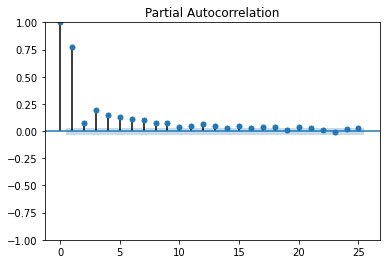

In [ ]:
# Next step is to find the order of AR model to be trained
# for this, we will plot partial autocorrelation plot to assess
# the direct effect of past data on future data. We look at the partial 
# autocorrelation plot and identify the lag after which most lags are not significant.
#
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(df['Temp'], lags=25)

Order of AR model (p) is 3.

In [ ]:
#
# Create training and test data
#
train_data = df['Temp'][:len(df)-100]
test_data = df['Temp'][len(df)-100:]
#
# Instantiate and fit the AR model with training data
#
ar_model = AutoReg(train_data, lags=3).fit()
#
# Print Summary
#
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                   Temp   No. Observations:                 3550
Model:                     AutoReg(3)   Log Likelihood               -8305.523
Method:               Conditional MLE   S.D. of innovations              2.516
Date:                Thu, 26 May 2022   AIC                          16621.046
Time:                        12:20:45   BIC                          16651.915
Sample:                             3   HQIC                         16632.056
                                 3550                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8553      0.135     13.787      0.000       1.592       2.119
Temp.L1        0.7021      0.016     42.599      0.000       0.670       0.734
Temp.L2       -0.0608      0.020     -3.005      0.0

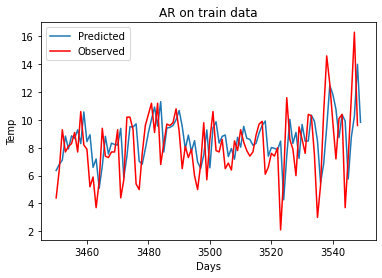

In [ ]:
pred_train = ar_model.predict(start=len(train_data)-100, end=(len(train_data)-1), dynamic=False)

# Plot the prediction vs train data
#
plt.plot(pred_train,label = 'Predicted')
plt.plot(df['Temp'][len(train_data)-100:len(train_data)-1], color='red',label = 'Observed')
plt.title('AR on train data')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Temp')
plt.show()

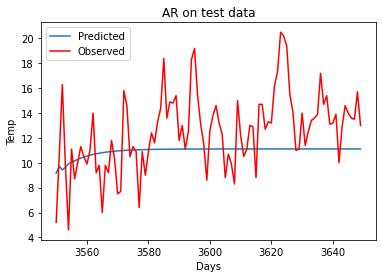

In [ ]:
#
# Make the predictions on test data
#
pred = ar_model.predict(start=len(train_data), end=(len(df)-1), dynamic=False)
#
# Plot the prediction vs test data
#

plt.plot(pred,label='Predicted')
plt.plot(test_data, color='red',label = 'Observed')
plt.title('AR on test data')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Temp')
plt.show()

The method is suitable for univariate time series without trend and seasonal components.

### 2. Moving average

It models the next step in the sequence as a linear function of the residual errors from a mean process at prior time steps.

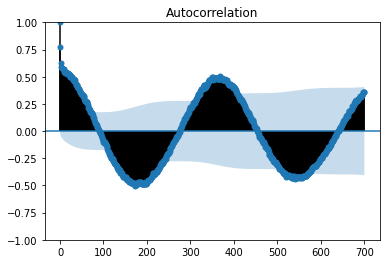

In [ ]:
# Next step is to find the order of AR model to be trained
# for this, we will plot autocorrelation plot to assess
# the direct effect of past data on future data. We look at the
# autocorrelation plot and identify the lag after which most lags are not significant.

from statsmodels.graphics.tsaplots import plot_acf
acf = plot_acf(df['Temp'], lags=700)

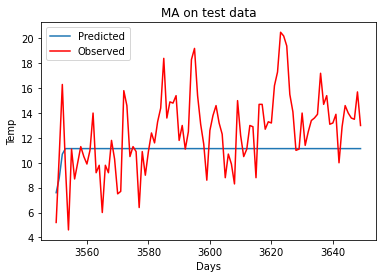

In [ ]:
# MA example
from statsmodels.tsa.arima.model import ARIMA

# Create training and test data
#
train_data = df['Temp'][:len(df)-100]
test_data = df['Temp'][len(df)-100:]
# fit model
ar_model = ARIMA(train_data, order=(0, 0, 3)).fit()
# make prediction
pred = ar_model.predict(start=len(train_data), end=(len(df)-1), dynamic=False)

# Plot the prediction vs test data
#
plt.plot(pred,label='Predicted')
plt.plot(test_data, color='red',label = 'Observed')
plt.title('MA on test data')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Temp')
plt.show()

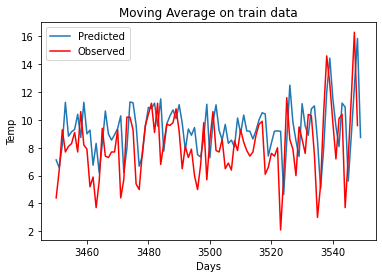

In [ ]:
pred_train = ar_model.predict(start=len(train_data)-100, end=(len(train_data)-1), dynamic=False)

# Plot the prediction vs train data
#
plt.plot(pred_train,label = 'Predicted')
plt.plot(df['Temp'][len(train_data)-100:len(train_data)-1], color='red',label = 'Observed')
plt.title('Moving Average on train data')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Temp')
plt.show()

In [ ]:
print(ar_model.summary())

                               SARIMAX Results                                
Dep. Variable:                   Temp   No. Observations:                 3550
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -8610.311
Date:                Thu, 26 May 2022   AIC                          17230.622
Time:                        12:20:48   BIC                          17261.495
Sample:                             0   HQIC                         17241.632
                               - 3550                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1399      0.116     96.109      0.000      10.913      11.367
ma.L1          0.7783      0.016     49.682      0.000       0.748       0.809
ma.L2          0.4700      0.019     25.174      0.0

The method is suitable for univariate time series without trend and seasonal components.

### 3. Autoregressive Integrated Moving Average (ARIMA)

The Autoregressive Integrated Moving Average (ARIMA) method models the next step in the sequence as a linear function of the differenced observations and residual errors at prior time steps.

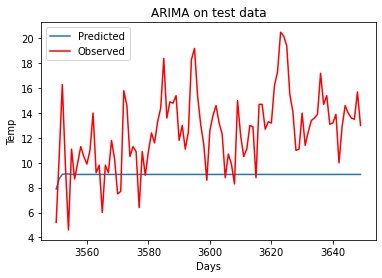

In [ ]:
# ARIMA example
from statsmodels.tsa.arima.model import ARIMA

# Create training and test data
#
train_data = df['Temp'][:len(df)-100]
test_data = df['Temp'][len(df)-100:]
# fit model
ar_model = ARIMA(train_data, order=(3, 1, 3)).fit()
# make prediction
pred = ar_model.predict(start=len(train_data), end=(len(df)-1), dynamic=False,typ = 'levels')

# Plot the prediction vs test data
#
plt.plot(pred,label='Predicted')
plt.plot(test_data, color='red',label = 'Observed')
plt.title('ARIMA on test data')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Temp')
plt.show()

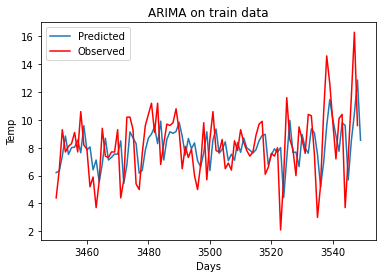

In [ ]:
pred_train = ar_model.predict(start=len(train_data)-100, end=(len(train_data)-1), dynamic=False)

# Plot the prediction vs train data
#
plt.plot(pred_train,label = 'Predicted')
plt.plot(df['Temp'][len(train_data)-100:len(train_data)-1], color='red',label = 'Observed')
plt.title('ARIMA on train data')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Temp')
plt.show()

In [ ]:
# Print Summary
#
print(ar_model.summary())

                               SARIMAX Results                                
Dep. Variable:                   Temp   No. Observations:                 3550
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -8152.179
Date:                Thu, 26 May 2022   AIC                          16318.358
Time:                        12:20:50   BIC                          16361.579
Sample:                             0   HQIC                         16333.773
                               - 3550                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1347      1.027     -0.131      0.896      -2.148       1.879
ar.L2          0.2353      0.434      0.542      0.588      -0.615       1.086
ar.L3         -0.1060      0.113     -0.941      0.3

The method is suitable for univariate time series with trend and without seasonal components.

### 4. Seasonal Autoregressive Integrated Moving Average (SARIMA)

The Seasonal Autoregressive Integrated Moving Average (SARIMA) method models the next step in the sequence as a linear function of the differenced observations, errors, differenced seasonal observations, and seasonal errors at prior time steps.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


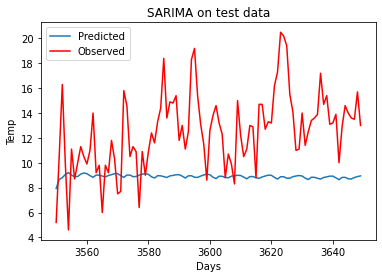

In [ ]:
# SARIMA example
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Create training and test data
#
train_data = df['Temp'][:len(df)-100]
test_data = df['Temp'][len(df)-100:]
# fit model
ar_model = SARIMAX(train_data, order=(3, 1, 3),seasonal_order=(3, 1, 3, 10)).fit()
# make prediction
pred = ar_model.predict(start=len(train_data), end=(len(df)-1), dynamic=False)

# Plot the prediction vs test data
#
plt.plot(pred,label='Predicted')
plt.plot(test_data, color='red',label = 'Observed')
plt.title('SARIMA on test data')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Temp')
plt.show()

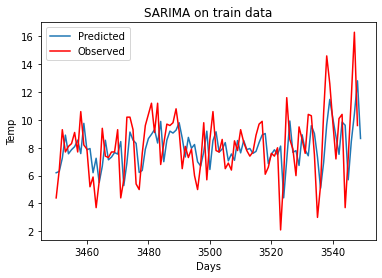

In [ ]:
pred_train = ar_model.predict(start=len(train_data)-100, end=(len(train_data)-1), dynamic=False)

# Plot the prediction vs train data
#
plt.plot(pred_train,label = 'Predicted')
plt.plot(df['Temp'][len(train_data)-100:len(train_data)-1], color='red',label = 'Observed')
plt.title('SARIMA on train data')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Temp')
plt.show()

In [ ]:
# Print Summary
#
print(ar_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Temp   No. Observations:                 3550
Model:             SARIMAX(3, 1, 3)x(3, 1, 3, 10)   Log Likelihood               -8160.772
Date:                            Thu, 26 May 2022   AIC                          16347.545
Time:                                    12:23:46   BIC                          16427.776
Sample:                                         0   HQIC                         16376.162
                                           - 3550                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6776      1.855      0.365      0.715      -2.957       4.312
ar.L2         -0.1534      0.951   

The method is suitable for univariate time series with trend and/or seasonal components.

The parameters from the above methods have not been optimised because of insufficient runtime capacity of my personal computer. But we can see that the models do not predict any long term trend in our data. The SARIMA model captures some seasonality.

The models can be optimised further by changing the parameters. For example the MA parameter can be optimised by taking the value equal to that when the ACF plot crosses a threshold (0.05) for the 1st time.

### 5. Simple Exponential Smoothing (SES) 

The Simple Exponential Smoothing (SES) method models the next time step as an exponentially weighted linear function of observations at prior time steps. The method is suitable for univariate time series without trend and seasonal components.


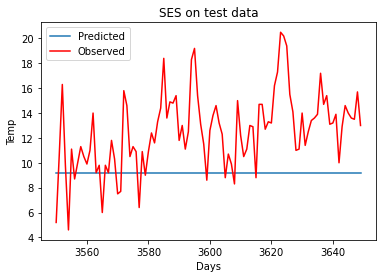

In [ ]:
# SES example
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Create training and test data
#
train_data = df['Temp'][:len(df)-100]
test_data = df['Temp'][len(df)-100:]
# fit model
ar_model = SimpleExpSmoothing(train_data).fit()
# make prediction
pred = ar_model.predict(start=len(train_data), end=(len(df)-1))

# Plot the prediction vs test data
#
plt.plot(pred,label='Predicted')
plt.plot(test_data, color='red',label = 'Observed')
plt.title('SES on test data')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Temp')
plt.show()

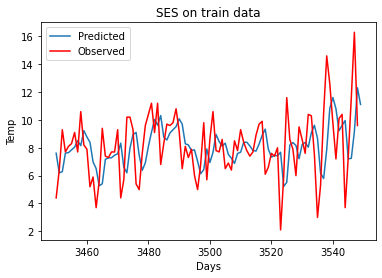

In [ ]:
pred_train = ar_model.predict(start=len(train_data)-100, end=(len(train_data)-1))

# Plot the prediction vs train data
#
plt.plot(pred_train,label = 'Predicted')
plt.plot(df['Temp'][len(train_data)-100:len(train_data)-1], color='red',label = 'Observed')
plt.title('SES on train data')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Temp')
plt.show()

In [ ]:
# Print Summary
#
print(ar_model.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                   Temp   No. Observations:                 3550
Model:             SimpleExpSmoothing   SSE                          24180.765
Optimized:                       True   AIC                           6815.065
Trend:                           None   BIC                           6827.414
Seasonal:                        None   AICC                          6815.076
Seasonal Periods:                None   Date:                 Thu, 26 May 2022
Box-Cox:                        False   Time:                         12:23:47
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.4404807                alpha                 True
initial_level              18.846916                

### 6. Holt Winter’s Exponential Smoothing (HWES)

The Holt Winter’s Exponential Smoothing (HWES) also called the Triple Exponential Smoothing method models the next time step as an exponentially weighted linear function of observations at prior time steps, taking trends and seasonality into account. The method is suitable for univariate time series with trend and/or seasonal components.

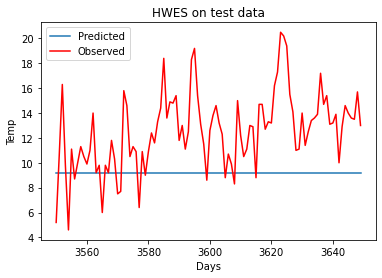

In [ ]:
# HWES example
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Create training and test data
#
train_data = df['Temp'][:len(df)-100]
test_data = df['Temp'][len(df)-100:]
# fit model
ar_model = ExponentialSmoothing(train_data).fit()
# make prediction
pred = ar_model.predict(start=len(train_data), end=(len(df)-1))

# Plot the prediction vs test data
#
plt.plot(pred,label='Predicted')
plt.plot(test_data, color='red',label = 'Observed')
plt.title('HWES on test data')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Temp')
plt.show()

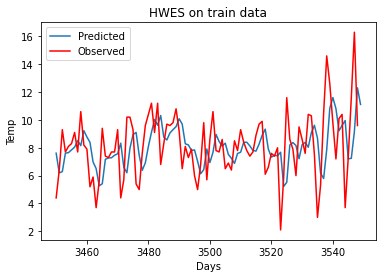

In [ ]:
pred_train = ar_model.predict(start=len(train_data)-100, end=(len(train_data)-1))

# Plot the prediction vs train data
#
plt.plot(pred_train,label = 'Predicted')
plt.plot(df['Temp'][len(train_data)-100:len(train_data)-1], color='red',label = 'Observed')
plt.title('HWES on train data')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Temp')
plt.show()

In [ ]:
# Print Summary
#
print(ar_model.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                     Temp   No. Observations:                 3550
Model:             ExponentialSmoothing   SSE                          24180.765
Optimized:                         True   AIC                           6815.065
Trend:                             None   BIC                           6827.414
Seasonal:                          None   AICC                          6815.076
Seasonal Periods:                  None   Date:                 Thu, 26 May 2022
Box-Cox:                          False   Time:                         12:23:47
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.4404804                alpha                 True
initial_level              18.8468

### 7. Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)

The Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX) is an extension of the SARIMA model that also includes the modeling of exogenous variables.

Other classical approaches include:



1.   **Vector Autoregression (VAR) -** The Vector Autoregression (VAR) method models the next step in each time series using an AR model. It is the generalization of AR to multiple parallel time series, e.g. multivariate time series. The method is suitable for multivariate time series without trend and seasonal components.
2.  **Vector Autoregression Moving-Average (VARMA)** - The Vector Autoregression Moving-Average (VARMA) method models the next step in each time series using an ARMA model. It is the generalization of ARMA to multiple parallel time series, e.g. multivariate time series. The method is suitable for multivariate time series without trend and seasonal components.
3.**Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX)** - The Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX) is an extension of the VARMA model that also includes the modeling of exogenous variables. It is a multivariate version of the ARMAX method. The method is suitable for multivariate time series without trend and seasonal components with exogenous variables.




## Week 3

**Machine Learning -** It involves providing a template or a model to the computer for performing a given task. Machine Learning tasks can be divided into classification and regression. Classifiers include: Naive Bayes, Logistic Regression, Decision trees etc. Regression tasks can be performed using: Linear Regression, Decision trees etc. Clustering tasks are performed using Decision trees, Support Vector Machines and K-means.

Overfitting occurs when the model fits the training data very well. It captures unwanted patterns of the training data as well and hence it does not perform well in case of the test data. To prevent this, regularization is done. Further, parameter estimation is performed using Maximum Likelihood Estimation (MLE) Maximum A Posteriori (MAP). Principal Component Analysis (PCA) is carried out for reducing the dimensionality for increasing computational efficiency. 

Ensemble Learning methods like Random Forests are used for increasing the robustness of the model.

**Deep Learning** - It involves a form of unsupervised learning using a neural network like structure. It uses backpropagation to optimise a series of weights to get the best performance. Various optimisation algorithms like RMSprop, Adam, Momentum and Adagrad are used for this purpose.

Convolutional neural networks is one such model used for image recognition and image classification. An autoencoder is a type of artificial neural network used to learn efficient data codings in an unsupervised manner. The aim of an autoencoder is to learn a representation (encoding) for a set of data, typically for dimensionality reduction, by training the network to ignore signal noise. Sequence modelling is used in the case of prediction of future time steps of a series. It is done using recurrent neural networks. However, RNNs suffer from vanishing gradients which can be overcome using LSTMs.The encoder-decoder architecture for recurrent neural networks is the standard method to address sequence-to-sequence problems, sometimes called seq2seq. Attention is a mechanism that was developed to improve the performance of the Encoder-Decoder RNN on machine translation. Generative adversarial networks (GANs) are algorithmic architectures that use two neural networks, pitting one against the other (thus the “adversarial”) in order to generate new, synthetic instances of data that can pass for real data. They are used widely in image generation, video generation and voice generation. 

### Predicting credit card default using machine learning

In [ ]:
df = pd.read_csv('UCI_Credit_Card.csv')
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Unknown values of 'Education' and 'Marriage' columns are replaced.

In [ ]:
df['EDUCATION'] = df['EDUCATION'].replace([0,5,6],4)
print(df['EDUCATION'].value_counts())

fil = (df['MARRIAGE'] == 0)
df.loc[fil, 'MARRIAGE'] = 3
print(df['MARRIAGE'].value_counts())

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64
2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64


Getting the features and labels:

In [ ]:
x = df.copy()
y = x.pop('default.payment.next.month')

Checking the memory usage

In [ ]:
def memory_usage(df, columns=5):
    print('Memory usage ----')
    memory_per_column = df.memory_usage(deep=True) / 1024 ** 2
    print(f'Top {columns} columns by memory (MB):')
    print(memory_per_column.sort_values(ascending=False) \
    .head(columns))
    print(f'Total size: {memory_per_column.sum():.4f} MB')
    
memory_usage(df)

Memory usage ----
Top 5 columns by memory (MB):
BILL_AMT1    0.228882
ID           0.228882
PAY_AMT6     0.228882
PAY_AMT5     0.228882
PAY_AMT4     0.228882
dtype: float64
Total size: 5.7222 MB


The data is already compressed.

**Exploratory Data Analysis**

In [ ]:
df.describe().round().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.0,8660.0,1.0,7501.0,15000.0,22500.0,30000.0
LIMIT_BAL,30000.0,167484.0,129748.0,10000.0,50000.0,140000.0,240000.0,1000000.0
SEX,30000.0,2.0,0.0,1.0,1.0,2.0,2.0,2.0
EDUCATION,30000.0,2.0,1.0,1.0,1.0,2.0,2.0,4.0
MARRIAGE,30000.0,2.0,1.0,1.0,1.0,2.0,2.0,3.0
AGE,30000.0,35.0,9.0,21.0,28.0,34.0,41.0,79.0
PAY_0,30000.0,-0.0,1.0,-2.0,-1.0,0.0,0.0,8.0
PAY_2,30000.0,-0.0,1.0,-2.0,-1.0,0.0,0.0,8.0
PAY_3,30000.0,-0.0,1.0,-2.0,-1.0,0.0,0.0,8.0
PAY_4,30000.0,-0.0,1.0,-2.0,-1.0,0.0,0.0,8.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


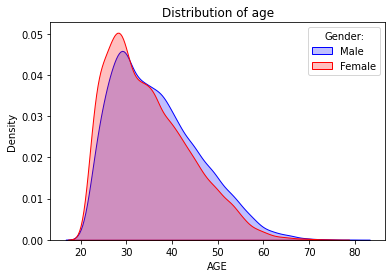

In [ ]:
fig, ax = plt.subplots()
sns.distplot(df.loc[df.SEX==1, 'AGE'].dropna(),
    hist=False, color='blue',
    kde_kws={"shade": True},
    ax=ax, label='Male')
sns.distplot(df.loc[df.SEX==2, 'AGE'].dropna(),
    hist=False, color='red',
    kde_kws={"shade": True},
    ax=ax, label='Female')
ax.set_title('Distribution of age')
ax.legend(title='Gender:')

The skewness in the plot shows that that there are more younger people.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Target variable distribution')

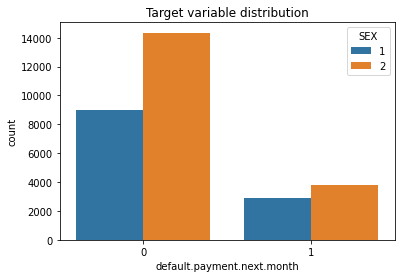

In [ ]:
ax = sns.countplot('default.payment.next.month', hue='SEX',data=df, orient='h')
ax.set_title('Target variable distribution')

The plot shows that there are more female defaulters than male.

Text(0.5, 1.0, 'Limit balance per education level distribution')

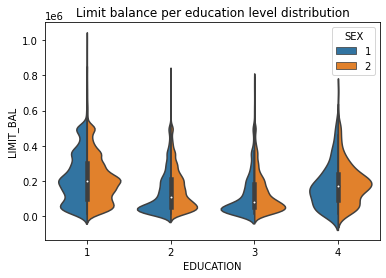

In [ ]:
ax = sns.violinplot(x='EDUCATION', y='LIMIT_BAL',hue='SEX', split=True, data=df)
ax.set_title('Limit balance per education level distribution')

The limit balance seems higher for the graduate school group.

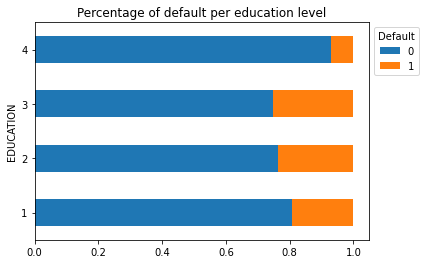

In [ ]:
ax = df.groupby("EDUCATION")['default.payment.next.month'] \
    .value_counts(normalize=True) \
    .unstack() \
    .plot(kind='barh', stacked='True')
ax.set_title('Percentage of default per education level')
ax.legend(title='Default', bbox_to_anchor=(1,1))

The graph shows that the highest default occurs within the high school and university levels.

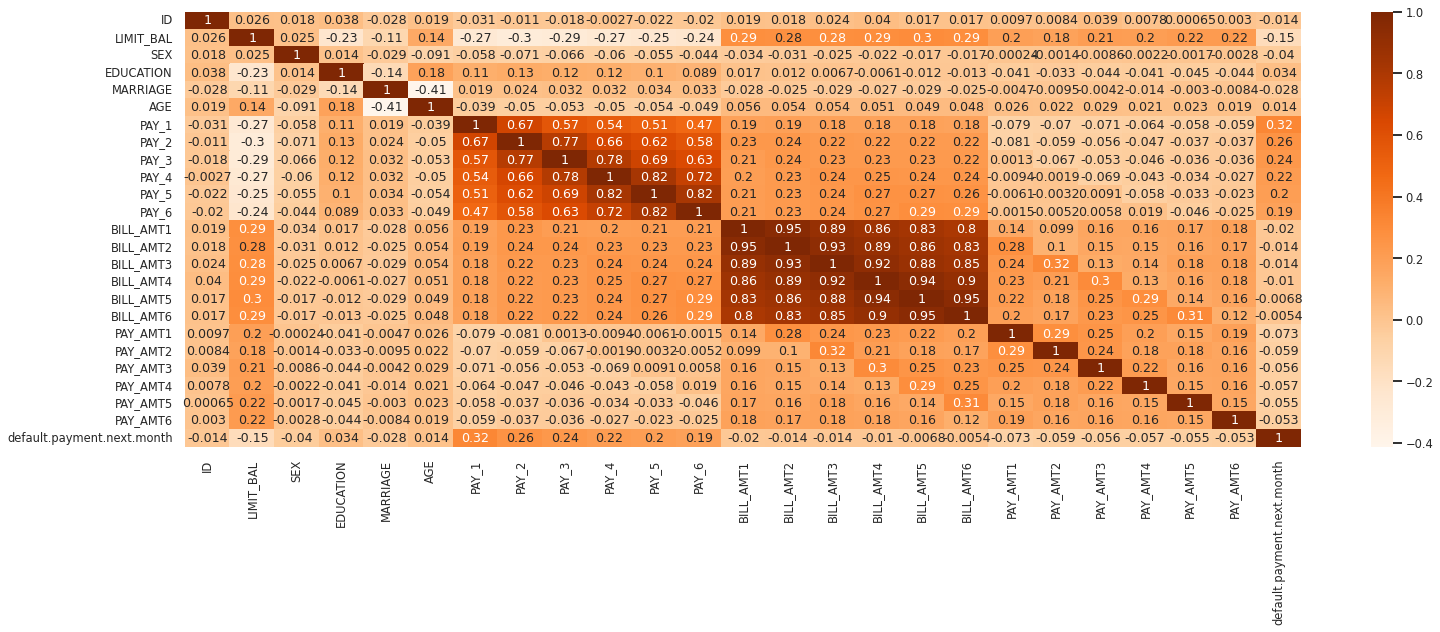

In [ ]:
df = df.rename({'PAY_0':'PAY_1'}, axis ='columns')
sns.set(rc={'figure.figsize':(25,8)})
sns.set_context("talk", font_scale=0.7)
sns.heatmap(df.corr(), cmap='Oranges', annot=True)

Higher delay and lower limit balance have a higher chance of default next month.

Text(0.5, 1.05, 'Pairplot')

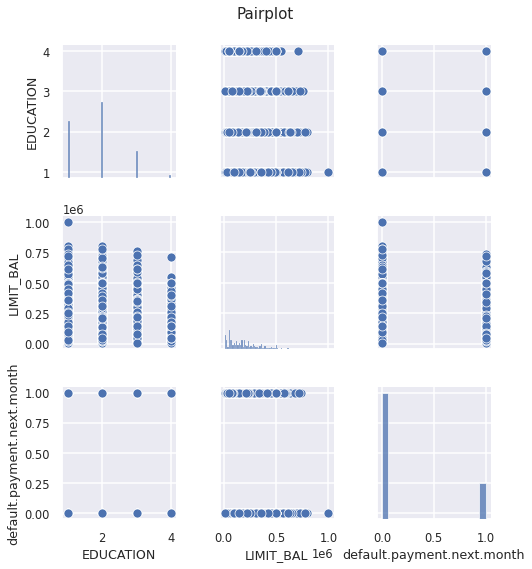

In [ ]:
pair_plot = sns.pairplot(df[['EDUCATION', 'LIMIT_BAL','default.payment.next.month']])
pair_plot.fig.suptitle('Pairplot', y=1.05)

The graph shows the presence of outliers and hence we need to pick a classifier that is less sensitive to outliers.

One hot encoding is performed for the ordinal and nominal data.

In [ ]:
df_dum = pd.get_dummies(df, columns=["EDUCATION"], prefix=["Edu"] )
df_dum = df.merge(df_dum, how='outer')

df_dum2 = pd.get_dummies(df, columns=["SEX"], prefix=["SEX"] )
df_dum2 = df_dum.merge(df_dum2, how='outer')

df_dum3 = pd.get_dummies(df, columns=["MARRIAGE"], prefix=["MARRIAGE"] )
df_dum3 = df_dum2.merge(df_dum3, how='outer')

df_dum4 = pd.get_dummies(df, columns=["PAY_1"], prefix=["p1"] )
df_dum4 = df_dum3.merge(df_dum4, how='outer')

df_dum5 = pd.get_dummies(df, columns=["PAY_2"], prefix=["p2"] )
df_dum5 = df_dum4.merge(df_dum5, how='outer')

df_dum6 = pd.get_dummies(df, columns=["PAY_3"], prefix=["p3"] )
df_dum6 = df_dum5.merge(df_dum6, how='outer')

df_dum7 = pd.get_dummies(df, columns=["PAY_4"], prefix=["p4"] )
df_dum7 = df_dum6.merge(df_dum7, how='outer')

df_dum8 = pd.get_dummies(df, columns=["PAY_5"], prefix=["p5"] )
df_dum8 = df_dum7.merge(df_dum8, how='outer')

df_dum9 = pd.get_dummies(df, columns=["PAY_6"], prefix=["p6"] )
df_dum9 = df_dum8.merge(df_dum9, how='outer')

df_dum9 = df_dum9.drop(['SEX','EDUCATION','MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'],axis=1)
print(df_dum9)

          ID  LIMIT_BAL  AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
0          1    20000.0   24     3913.0     3102.0      689.0        0.0   
1          2   120000.0   26     2682.0     1725.0     2682.0     3272.0   
2          3    90000.0   34    29239.0    14027.0    13559.0    14331.0   
3          4    50000.0   37    46990.0    48233.0    49291.0    28314.0   
4          5    50000.0   57     8617.0     5670.0    35835.0    20940.0   
...      ...        ...  ...        ...        ...        ...        ...   
29995  29996   220000.0   39   188948.0   192815.0   208365.0    88004.0   
29996  29997   150000.0   43     1683.0     1828.0     3502.0     8979.0   
29997  29998    30000.0   37     3565.0     3356.0     2758.0    20878.0   
29998  29999    80000.0   41    -1645.0    78379.0    76304.0    52774.0   
29999  30000    50000.0   46    47929.0    48905.0    49764.0    36535.0   

       BILL_AMT5  BILL_AMT6  PAY_AMT1  ...  p6_-2  p6_-1  p6_0  p6_2  p6_3  \
0        

Next minmax scaling is performed for normalizing the data.

In [ ]:
from sklearn import preprocessing as prep
minmax_scale = prep.MinMaxScaler().fit(df_dum9)
credit_minmax = minmax_scale.transform(df_dum9)
credit_minmax = pd.DataFrame(credit_minmax, columns = list(df_dum9))
credit_minmax

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,...,p6_-2,p6_-1,p6_0,p6_2,p6_3,p6_4,p6_5,p6_6,p6_7,p6_8
0,0.000000,0.010101,0.051724,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000033,0.111111,0.086207,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000067,0.080808,0.224138,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000100,0.040404,0.275862,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000133,0.040404,0.620690,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.999867,0.212121,0.310345,0.313716,0.249208,0.200746,0.243036,0.111622,0.273259,0.009730,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29996,0.999900,0.141414,0.379310,0.148008,0.067955,0.088267,0.168596,0.085794,0.260979,0.002103,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29997,0.999933,0.020202,0.275862,0.149674,0.069405,0.087859,0.179805,0.101057,0.275854,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29998,0.999967,0.070707,0.344828,0.145064,0.140604,0.128239,0.209850,0.092403,0.298591,0.098334,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Creating train and test splits**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=21)
y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)

0    0.778833
1    0.221167
Name: default.payment.next.month, dtype: float64

Checking for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_0      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

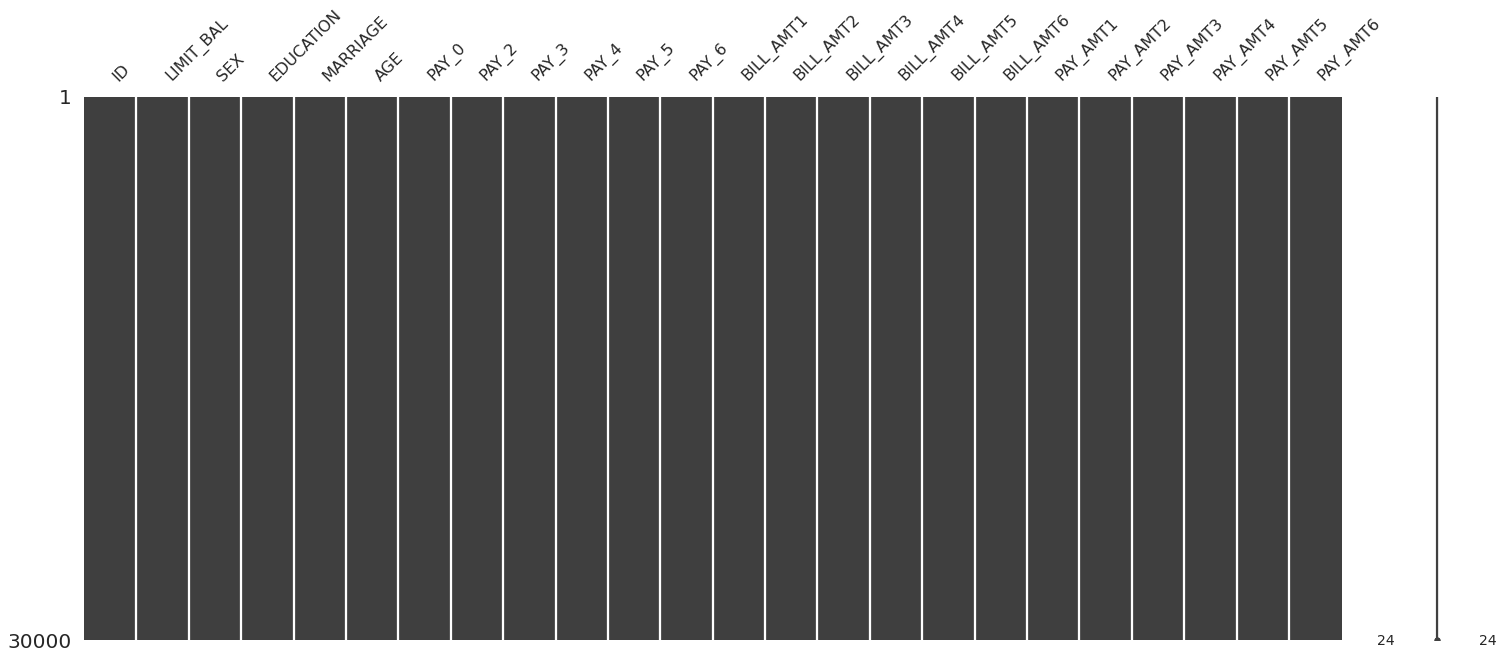

In [ ]:
import missingno

x.info()
missingno.matrix(x)

**Checking different classifiers**

1. Decision Tree Classifier

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, make_scorer

In [ ]:
clf_gini = DecisionTreeClassifier(criterion = 'gini', random_state = 100, max_depth = 3, min_samples_leaf = 5)
clf_gini.fit(X_train, y_train)

prediction = clf_gini.predict(X_test)


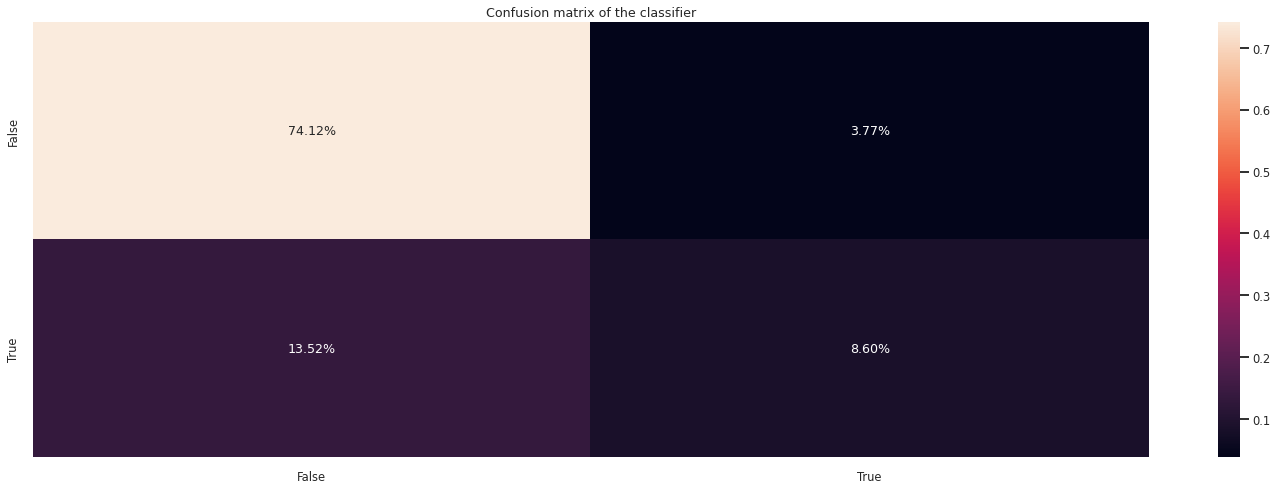

In [ ]:
# Plotting the confusion matrix
cm = sklearn.metrics.confusion_matrix(y_test, prediction)
ax = sns.heatmap(cm/np.sum(cm), annot=True, fmt='0.2%')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.title('Confusion matrix of the classifier')
plt.show()

Random Oversampling:
0    18691
1    18691
Name: default.payment.next.month, dtype: int64


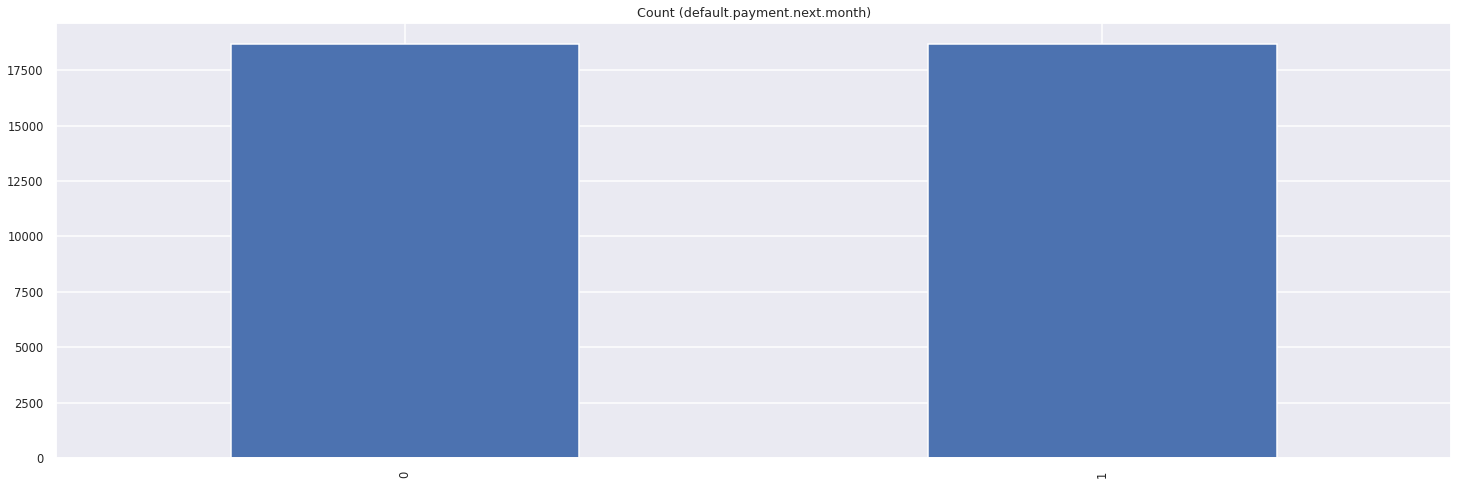

In [ ]:
df_train = pd.concat([X_train, y_train],axis=1)
df_train

df_test = pd.concat([X_test, y_test],axis=1)
df_test

count_class_0, count_class_1 = df_train['default.payment.next.month'].value_counts()

df_majority = df_train[df_train['default.payment.next.month']==0]
df_minority = df_train[df_train['default.payment.next.month']==1]

df_minority_upsampled = df_minority.sample(count_class_0, replace=True)
df_upsampled = pd.concat([df_majority,df_minority_upsampled],axis=0)
 
print('Random Oversampling:')
print(df_upsampled['default.payment.next.month'].value_counts())
 

df_upsampled['default.payment.next.month'].value_counts().plot(kind='bar', title='Count (default.payment.next.month)');

After balancing the dataset, we perform the classification using the classifer again.

Decision Tree Model Report
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      4673
           1       0.47      0.62      0.54      1327

    accuracy                           0.76      6000
   macro avg       0.68      0.71      0.69      6000
weighted avg       0.79      0.76      0.77      6000

[[3752  921]
 [ 498  829]]


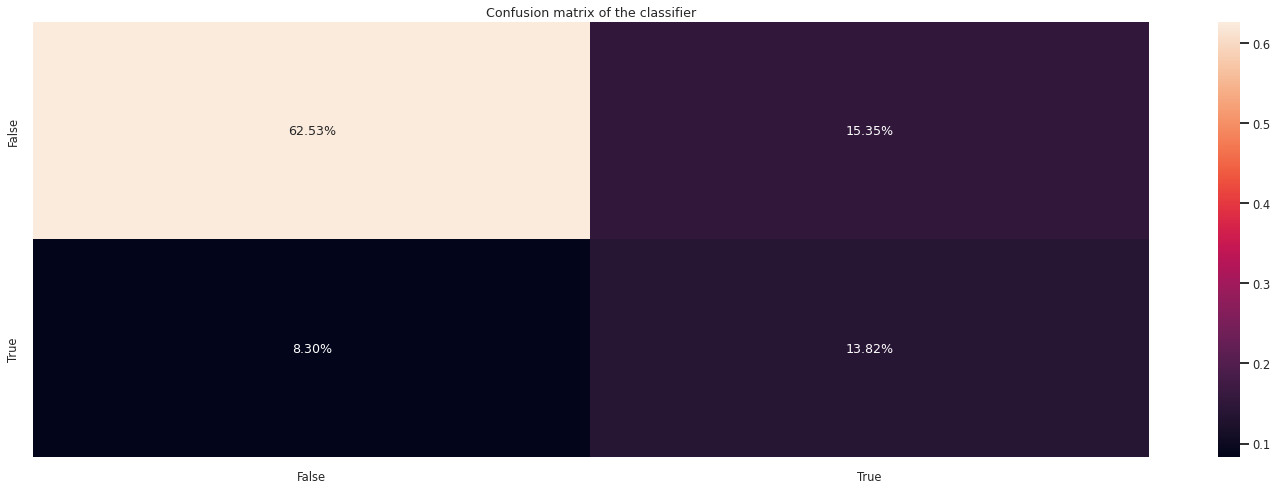

0.5915933666523131


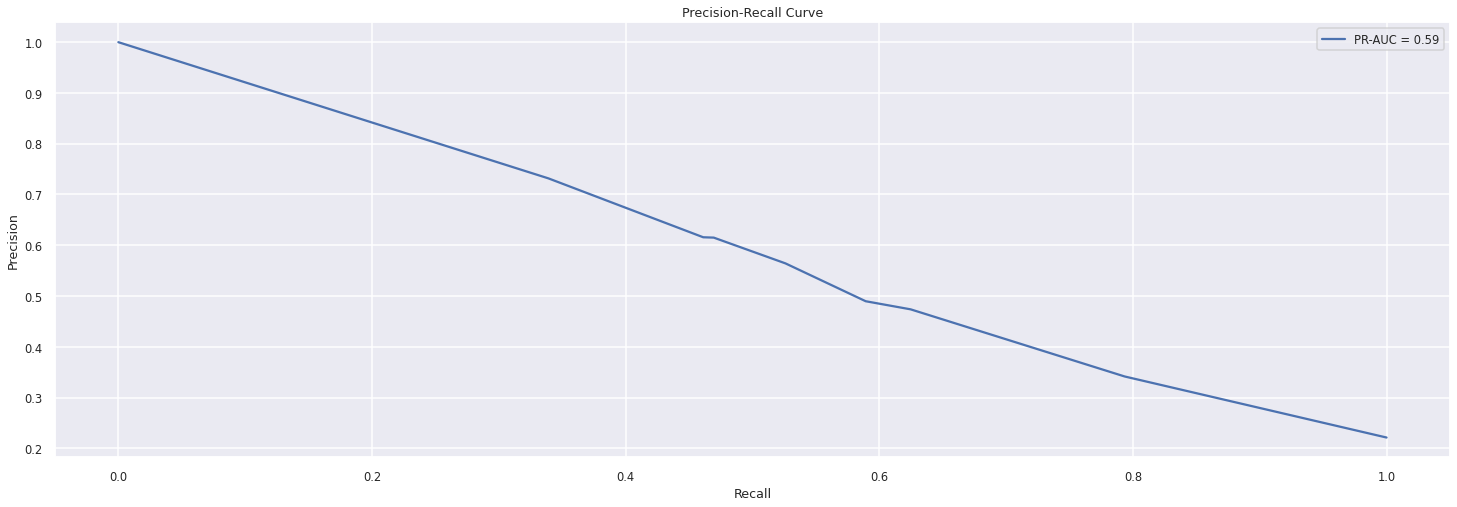

In [ ]:
X_train_upsampled = df_upsampled.drop(["default.payment.next.month"],axis=1)
y_train_upsampled = df_upsampled["default.payment.next.month"]

clf_gini = DecisionTreeClassifier(criterion = 'gini', random_state = 100, max_depth = 3, min_samples_leaf = 5)
clf_gini.fit(X_train_upsampled, y_train_upsampled)

prediction = clf_gini.predict(X_test)
print("Decision Tree Model Report")
report = sklearn.metrics.classification_report(y_test, prediction)
print(report)

#Plot the Matrix
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, prediction)
print(confusion_matrix)

# Plotting the confusion matrix
cm = sklearn.metrics.confusion_matrix(y_test, prediction)
ax = sns.heatmap(cm/np.sum(cm), annot=True, fmt='0.2%')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.title('Confusion matrix of the classifier')
plt.show()

y_pred_prob = clf_gini.predict_proba(X_test)[:, 1]
precision, recall, thresholds = sklearn.metrics.precision_recall_curve(y_test, y_pred_prob)
print(sklearn.metrics.auc(recall, precision))

ax = plt.subplot()
ax.plot(recall, precision,
label=f'PR-AUC = {sklearn.metrics.auc(recall, precision):.2f}')
ax.set(title='Precision-Recall Curve',
xlabel='Recall',
ylabel='Precision')
ax.legend()

2. Random Forest Classifier

Decision Tree Model Report
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      4673
           1       0.56      0.45      0.50      1327

    accuracy                           0.80      6000
   macro avg       0.71      0.68      0.69      6000
weighted avg       0.79      0.80      0.79      6000



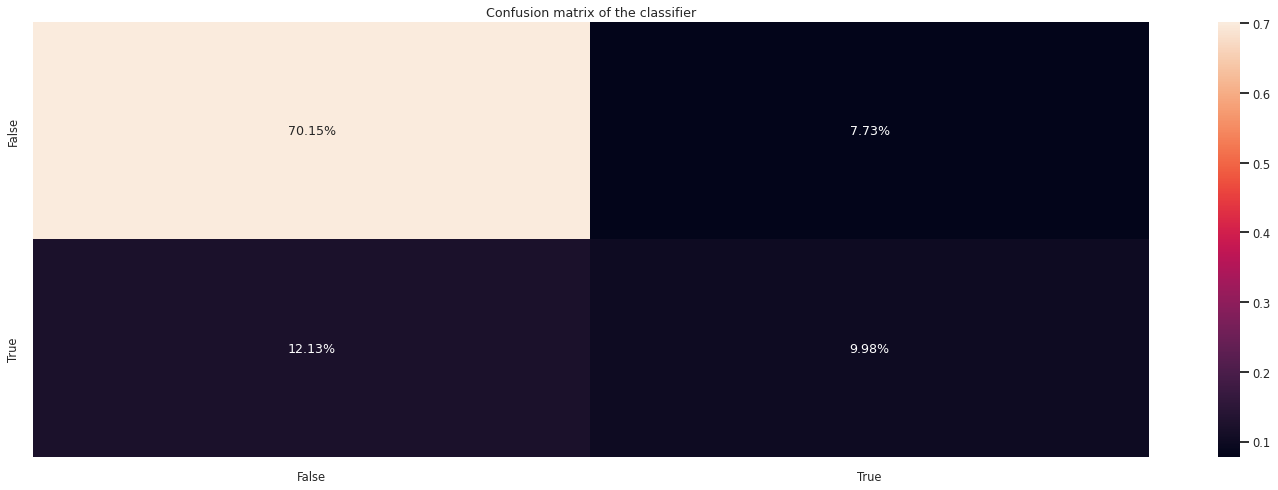

0.5164704103027045


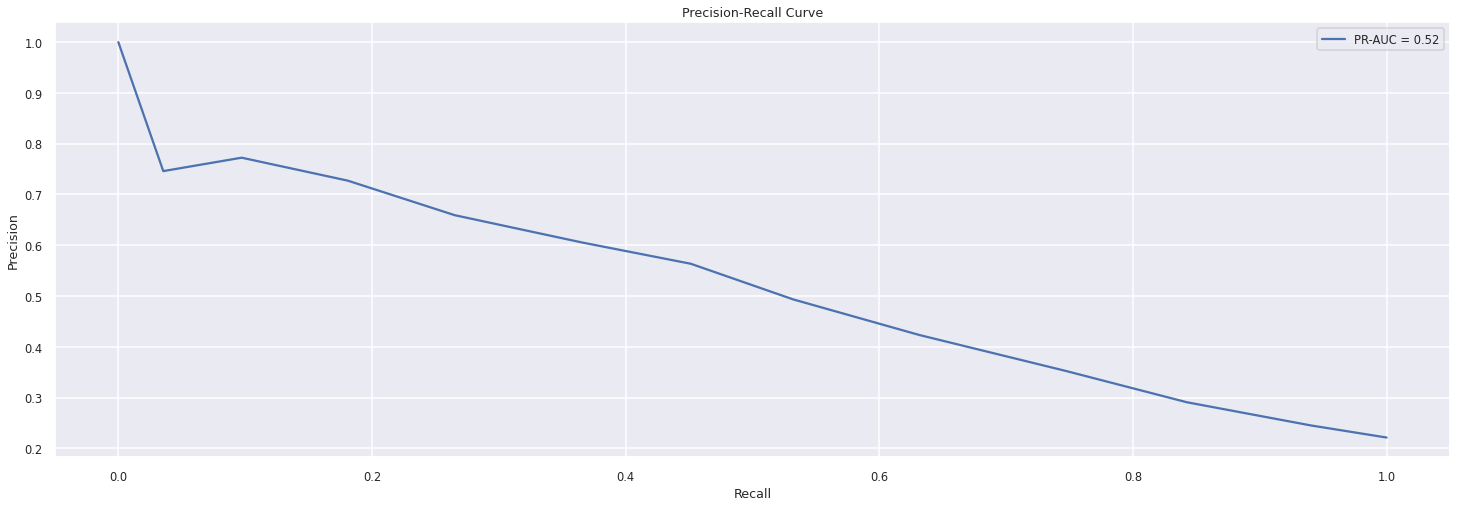

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf = RandomForestClassifier(n_jobs=1000,
                            random_state=9,
                            n_estimators=11,
                            verbose=False)

clf.fit(X_train_upsampled, y_train_upsampled)

prediction = clf.predict(X_test)
print("Decision Tree Model Report")
report = classification_report(y_test, prediction)
print(report)

#Plot the Matrix
cm = sklearn.metrics.confusion_matrix(y_test, prediction)
ax = sns.heatmap(cm/np.sum(cm), annot=True, fmt='0.2%')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.title('Confusion matrix of the classifier')
plt.show()


y_pred_prob = clf.predict_proba(X_test)[:, 1]
precision, recall, thresholds = sklearn.metrics.precision_recall_curve(y_test, y_pred_prob)
print(sklearn.metrics.auc(recall, precision))

ax = plt.subplot()
ax.plot(recall, precision,
label=f'PR-AUC = {sklearn.metrics.auc(recall, precision):.2f}')
ax.set(title='Precision-Recall Curve',
xlabel='Recall',
ylabel='Precision')
ax.legend()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.747


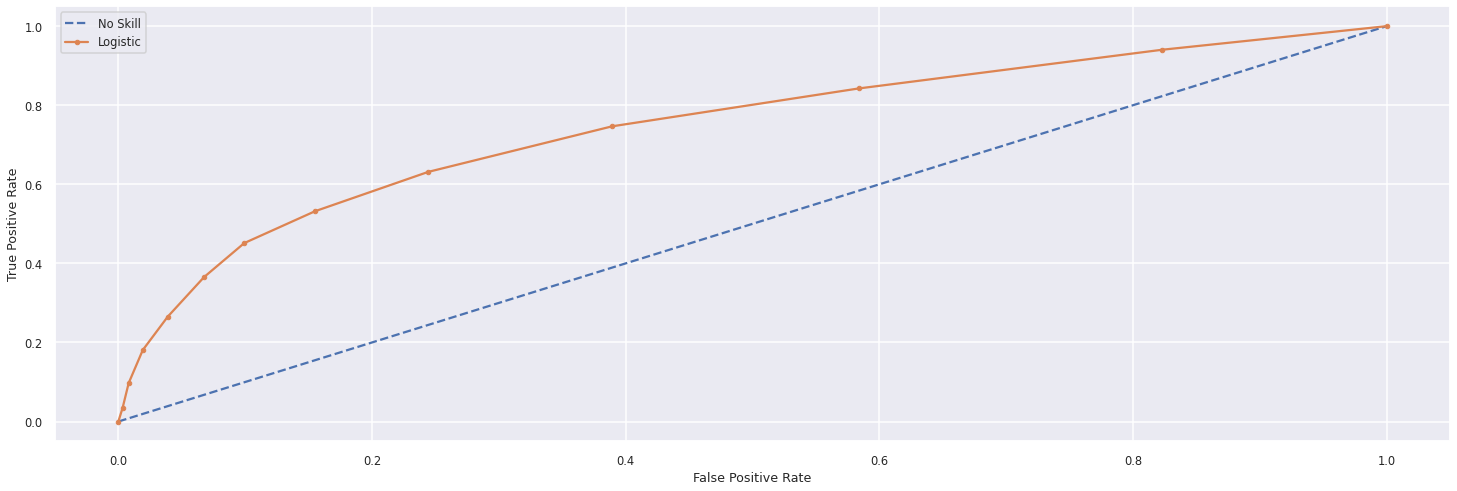

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(y_test))]
lr_probs = clf.predict_proba(X_test)

lr_probs = lr_probs[:, 1]

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

From the above results, we see that the random forest is a better classifier than decison tree as it uses ensemble techniques.